<a href="https://colab.research.google.com/github/Jitmandal051004/EEG_Analysis_SOP/blob/main/Grasp_and_Lift_EEG_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/competitions/grasp-and-lift-eeg-detection/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jitmandal24
Your Kaggle Key: ··········
Your Kaggle Key: ··········
Extracting archive ./grasp-and-lift-eeg-detection/grasp-and-lift-eeg-detection.zip to ./grasp-and-lift-eeg-detection


In [3]:
import zipfile
import os

def extract_zip(zip_file, extract_folder):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)
    print(f"Files extracted to: {extract_folder}")
    os.remove(zip_file)
    print(f"Deleted {zip_file}")

file_paths = ['/content/grasp-and-lift-eeg-detection/train.zip', '/content/grasp-and-lift-eeg-detection/test.zip', "/content/grasp-and-lift-eeg-detection/sample_submission.csv.zip"]
extract_folder = '/content/grasp-and-lift-eeg-detection'

for zip_file in file_paths:
    extract_zip(zip_file, extract_folder)


Files extracted to: /content/grasp-and-lift-eeg-detection
Deleted /content/grasp-and-lift-eeg-detection/train.zip
Files extracted to: /content/grasp-and-lift-eeg-detection
Deleted /content/grasp-and-lift-eeg-detection/test.zip
Files extracted to: /content/grasp-and-lift-eeg-detection
Deleted /content/grasp-and-lift-eeg-detection/sample_submission.csv.zip


In [20]:
!pip install mne --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.6 MB/s eta 0:00:00


In [47]:
import numpy as np
import pandas as pd
import mne

                          id  Fp1  Fp2   F7   F3   Fz   F4   F8  FC5  FC1  \
0            subj1_series1_0  -31  363  211  121  211   15  717  279   35   
1            subj1_series1_1  -29  342  216  123  222  200  595  329   43   
2            subj1_series1_2 -172  278  105   93  222  511  471  280   12   
3            subj1_series1_3 -272  263  -52   99  208  511  428  261   27   
4            subj1_series1_4 -265  213  -67   99  155  380  476  353   32   
...                      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
119491  subj1_series1_119491  478  520  377  172  141  118 -123  626   70   
119492  subj1_series1_119492  439  450  298  185  128  502 -331  593   30   
119493  subj1_series1_119493  363  370  278  239  124  768 -410  527   16   
119494  subj1_series1_119494  281  298  318  257  130  736 -556  542   29   
119495  subj1_series1_119495  242  266  234  176  135  617 -622  418   31   

        ...   P7   P3   Pz   P4   P8  PO9   O1   Oz   O2  PO10  
0       ..

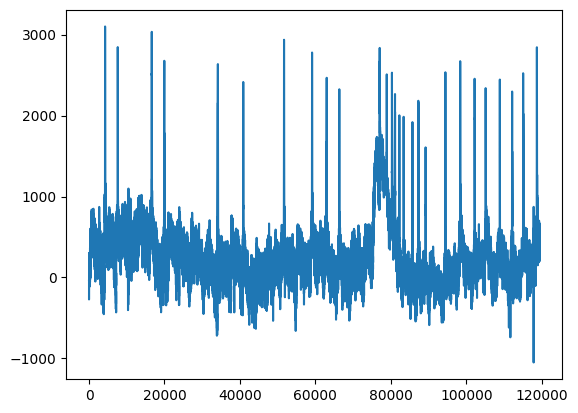

In [55]:
df = pd.read_csv("/content/grasp-and-lift-eeg-detection/train/subj1_series1_data.csv")
print(df)
ch_names = list(df.columns[1:])
print(ch_names)
print(df.columns[1:])

print(df["FC1"].shape)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(df["Fp1"])
plt.show()

In [53]:
scaling_factor = 1e-6
sampling_rate = 500

eeg_data = df.iloc[:, 1:].to_numpy(dtype = float)
eeg_data = eeg_data.T * scaling_factor
n_channels, n_samples = eeg_data.shape
ch_names = list(df.iloc[:, 1:].columns)
ch_types = ['eeg'] * n_channels
print("Number of samples:", n_samples)
print("Number of channels:", n_channels)
print("Channel names:", ch_names)
print("Channel types:", ch_types)
print(eeg_data)
print(eeg_data.shape)

Number of samples: 119496
Number of channels: 32
Channel names: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']
Channel types: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
[[-3.10e-05 -2.90e-05 -1.72e-04 ...  3.63e-04  2.81e-04  2.42e-04]
 [ 3.63e-04  3.42e-04  2.78e-04 ...  3.70e-04  2.98e-04  2.66e-04]
 [ 2.11e-04  2.16e-04  1.05e-04 ...  2.78e-04  3.18e-04  2.34e-04]
 ...
 [ 1.73e-04  1.41e-04  1.41e-04 ... -9.90e-05 -1.22e-04 -6.50e-05]
 [ 1.20e-04  8.30e-05  6.20e-05 ... -2.69e-04 -2.90e-04 -2.29e-04]
 [ 7.04e-04  7.37e-04  6.77e-04 ... -1.21e-04 -7.70e-05 -1.53e-04]]
(32, 119496)


Creating RawArray with float64 data, n_channels=32, n_times=119496
    Range : 0 ... 119495 =      0.000 ...   238.990 secs
Ready.
Using matplotlib as 2D backend.


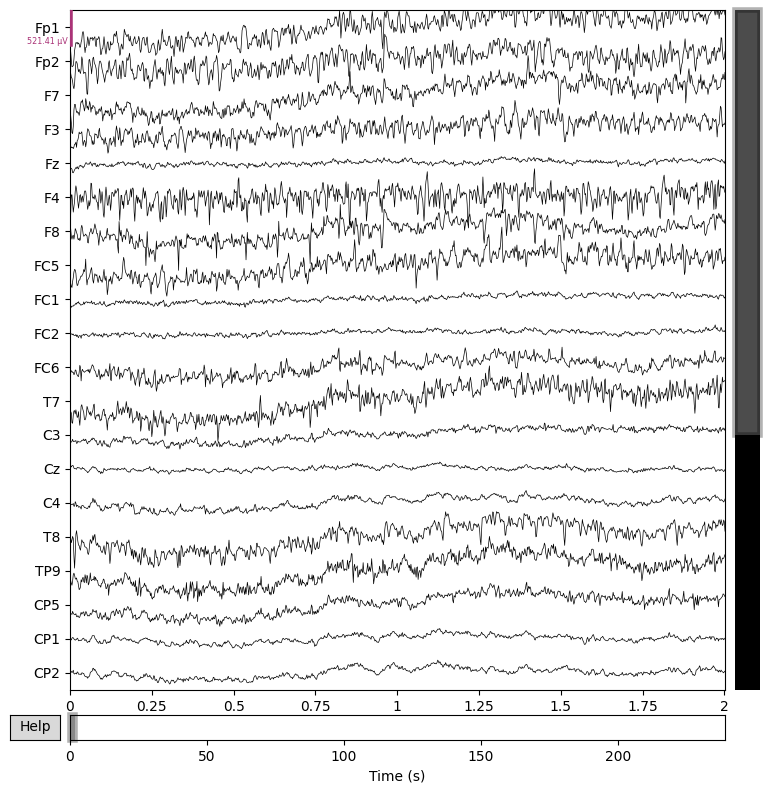

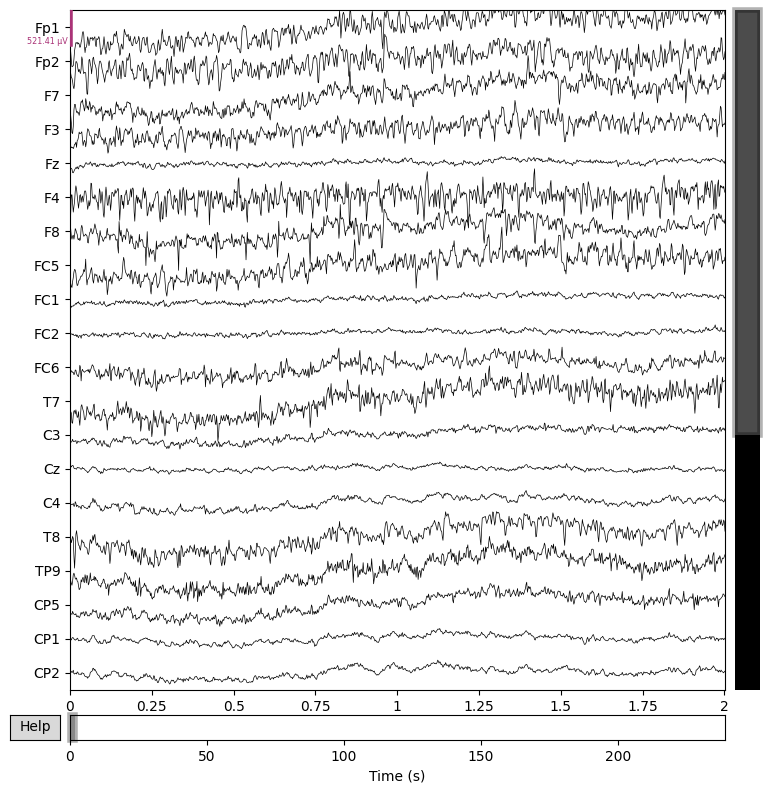

In [54]:
info = mne.create_info(ch_names=ch_names, sfreq=sampling_rate, ch_types=ch_types)
raw = mne.io.RawArray(eeg_data, info)
raw.plot(duration=2, scalings='auto')

### events

                          id  HandStart  FirstDigitTouch  BothStartLoadPhase  \
0            subj1_series1_0          0                0                   0   
1            subj1_series1_1          0                0                   0   
2            subj1_series1_2          0                0                   0   
3            subj1_series1_3          0                0                   0   
4            subj1_series1_4          0                0                   0   
...                      ...        ...              ...                 ...   
119491  subj1_series1_119491          0                0                   0   
119492  subj1_series1_119492          0                0                   0   
119493  subj1_series1_119493          0                0                   0   
119494  subj1_series1_119494          0                0                   0   
119495  subj1_series1_119495          0                0                   0   

        LiftOff  Replace  BothReleased 

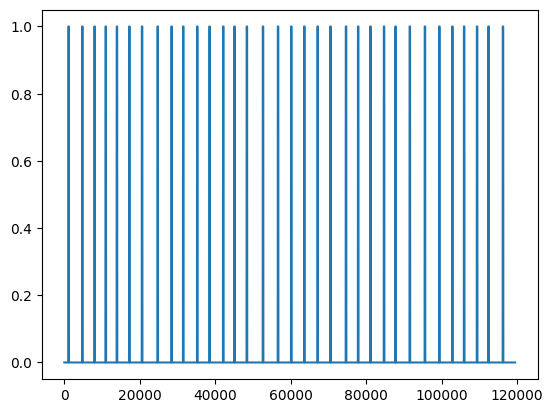

In [70]:
event = pd.read_csv("/content/grasp-and-lift-eeg-detection/train/subj1_series1_events.csv")
eeg_Events = event.iloc[:, 1:].to_numpy()
print(event)
print(f'unique:{event["HandStart"].unique()}')
print(f"eeg_Events:{eeg_Events}")
fig, ax = plt.subplots(1, 1)
ax.plot(event["HandStart"])
plt.show()